In [2]:
import numpy as np
import sklearn
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

import torch
from torch.autograd import Variable
import torch.nn.functional as F
from torch.utils import data

from sklearn.model_selection import train_test_split

%matplotlib inline
plt.rcParams['figure.figsize'] = (8*1.61803, 8.0) # set default size of plots
plt.rcParams.update({'font.size': 18})
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [3]:
def func1(X):
    return X + 0.5 * X**2 - X**3 + np.random.normal(0.0, 2e-2, (X.shape[0], 1))

def func2(X):
    return np.sin(X * np.pi) + + np.random.normal(0.0, 10e-2, (X.shape[0], 1))

In [4]:
np.random.seed(23864)
n_terms = 1
X = np.linspace(-1, 1, 500)[...,None]
y = func2(X)

print(X.shape)
print(y.shape)

(500, 1)
(500, 1)


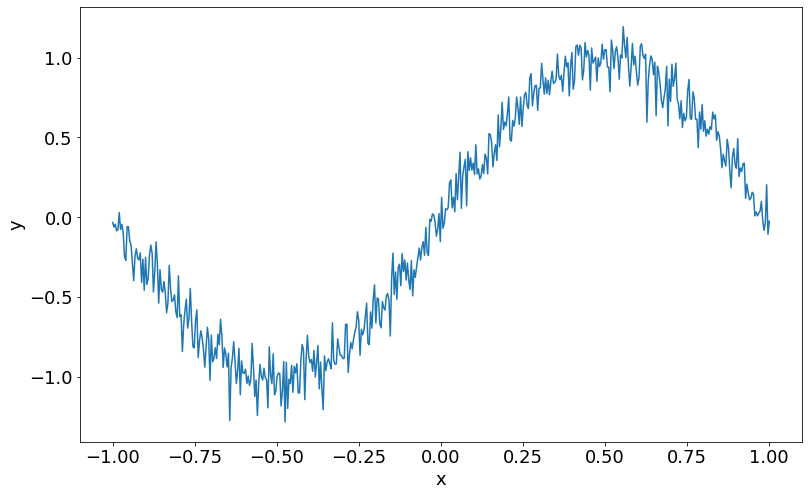

In [5]:
plt.plot(X, y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [6]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
print(x_train.shape)
print(y_train.shape)

(400, 1)
(400, 1)


In [8]:
class Net1(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net1, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
        self.predict = torch.nn.Linear(n_hidden, n_output)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        x = self.predict(x)             # linear output
        return x

    
class Net2(torch.nn.Module):
    def __init__(self, n_feature, n_hidden1, n_hidden2, n_output):
        super(Net2, self).__init__()
        self.hidden1 = torch.nn.Linear(n_feature, n_hidden1)   # hidden layer
        self.hidden2 = torch.nn.Linear(n_hidden1, n_hidden2)   # hidden layer
        self.predict = torch.nn.Linear(n_hidden2, n_output)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden1(x))      # activation function for hidden layer
        x = F.relu(self.hidden2(x))      # activation function for hidden layer
        x = self.predict(x)             # linear output
        return x

    
class Net3(torch.nn.Module):
    def __init__(self, n_feature, n_hidden1, n_hidden2, n_hidden3, n_output):
        super(Net3, self).__init__()
        self.hidden1 = torch.nn.Linear(n_feature, n_hidden1)   # hidden layer
        self.hidden2 = torch.nn.Linear(n_hidden1, n_hidden2)   # hidden layer
        self.hidden3 = torch.nn.Linear(n_hidden2, n_hidden3)   # hidden layer
        self.predict = torch.nn.Linear(n_hidden3, n_output)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden1(x))      # activation function for hidden layer
        x = F.relu(self.hidden2(x))      # activation function for hidden layer
        x = F.relu(self.hidden3(x))      # activation function for hidden layer
        x = self.predict(x)             # linear output
        return x

In [9]:
def count_params(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

In [15]:
# net = Net1(n_feature=1, n_hidden=5, n_output=1)     # define the network
# net = Net2(n_feature=1, n_hidden1=10, n_hidden2=10, n_output=1)     # define the network
net = Net3(n_feature=1, n_hidden1=10, n_hidden2=10, n_hidden3=10, n_output=1)     # define the network

bignet = Net2(n_feature=1, n_hidden1=14, n_hidden2=14, n_output=1)
print(count_params(net))
print(count_params(bignet))

print(net)  # net architecture
optimizer = torch.optim.SGD(net.parameters(), lr=0.2)
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss

251
253
Net3(
  (hidden1): Linear(in_features=1, out_features=10, bias=True)
  (hidden2): Linear(in_features=10, out_features=10, bias=True)
  (hidden3): Linear(in_features=10, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)


In [ ]:
plt.ion()   # something about plotting
for t in range(3000):
    prediction = net(x_train)     # input x and predict based on x

    loss = loss_func(prediction, y_train)     # must be (1. nn output, 2. target)

    optimizer.zero_grad()   # clear gradients for next train
    
    loss.backward()         # backpropagation, compute gradients
    
    optimizer.step()        # apply gradients

    y_pred = net(x_test)
    
    if t % 100 == 0:
        # plot and show learning process
        plt.cla()
        plt.scatter(x_train.data.numpy()[:,0], y_train.data.numpy())
        plt.plot(x_train.data.numpy()[:,0], prediction.data.numpy(), 'r*', lw=5)
        plt.plot(x_test.data.numpy()[:,0], y_pred.data.numpy(), 'g*', lw=1)
        plt.legend(['train', 'test', 'all'])
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 12, 'color':  'red'})
        plt.xlabel("target")
        plt.ylabel("predictor")
        plt.show()
        plt.pause(0.1)
plt.ioff()